## 이미지 데이터의 다중 분류 ( Multi-class Classificaiton )

In [1]:
# 데이터 준비
from tensorflow.keras.datasets import fashion_mnist

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [2]:
import keras.datasets as d
help(d)

Help on package keras.datasets in keras:

NAME
    keras.datasets - Small NumPy datasets for debugging/testing.

PACKAGE CONTENTS
    boston_housing
    cifar
    cifar10
    cifar100
    fashion_mnist
    imdb
    mnist
    reuters

FILE
    /usr/local/lib/python3.8/dist-packages/keras/datasets/__init__.py




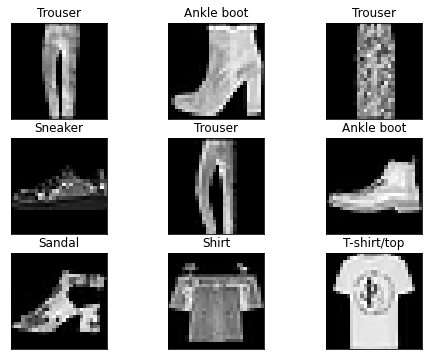

In [3]:
# 데이터 이미지 확인
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 
 'Dress', 'Coat', 'Sandal', 
 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
samples = np.random.randint(len(X_train), size=9) 

plt.figure(figsize = (8, 6))
for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap = 'gray')
  plt.title(class_names[y_train[idx]])
plt.show()

In [4]:
# 검증 데이터 분리
# 데이터가 적을 때는 테스트, 트레인 사이즈 반반으로 하기도 함
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
 X_train, y_train, test_size = 0.3, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


In [5]:
# 이미지 데이터 정규화

X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
print(np.max(X_train), np.min(X_train))
# 최소-최대 정규화 쓰는 이유 / gray 이미지이기 때문

1.0 0.0


In [6]:
# shape 변경

X_train = (X_train.reshape((-1, 28 * 28)))
X_val = (X_val.reshape((-1, 28 * 28)))
X_test = (X_test.reshape((-1, 28 * 28)))

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(42000, 784) (42000,)
(18000, 784) (18000,)
(10000, 784) (10000,)


In [7]:
# 원 핫 인코딩

from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

y_train_oh[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [8]:
# 모델 만들기
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(784,)))
  model.add(layers.Dense(64, activation = 'relu',input_shape=(784,)))
  model.add(layers.Dense(32, activation = 'relu'))
  model.add(layers.Dense(10, activation = 'softmax'))
  return model

In [9]:
# 모델 확인인
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 모델 컴파일
adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=adam,
 loss = 'categorical_crossentropy', 
 metrics=['acc'])

In [11]:
EPOCHS = 100
BATCH_SIZE = 64

history = model.fit(X_train, y_train_oh, 
 epochs = EPOCHS, 
 batch_size = BATCH_SIZE, 
 validation_data = (X_val, y_val_oh),
 verbose = 1)

Epoch 1/100
657/657 [==============================] - 8s 7ms/step - loss: 0.6129 - acc: 0.7911 - val_loss: 0.4466 - val_acc: 0.8451
Epoch 2/100
657/657 [==============================] - 5s 7ms/step - loss: 0.4223 - acc: 0.8507 - val_loss: 0.4187 - val_acc: 0.8496
Epoch 3/100
657/657 [==============================] - 5s 7ms/step - loss: 0.3808 - acc: 0.8626 - val_loss: 0.3912 - val_acc: 0.8613
Epoch 4/100
657/657 [==============================] - 2s 4ms/step - loss: 0.3571 - acc: 0.8720 - val_loss: 0.3961 - val_acc: 0.8570
Epoch 5/100
657/657 [==============================] - 2s 4ms/step - loss: 0.3385 - acc: 0.8758 - val_loss: 0.3473 - val_acc: 0.8761
Epoch 6/100
657/657 [==============================] - 2s 4ms/step - loss: 0.3215 - acc: 0.8834 - val_loss: 0.3620 - val_acc: 0.8708
Epoch 7/100
657/657 [==============================] - 2s 4ms/step - loss: 0.3045 - acc: 0.8901 - val_loss: 0.3406 - val_acc: 0.8786
Epoch 8/100
657/657 [==============================] - 2s 4ms/step - 

In [12]:
# 학습곡선
def plot_history(history):
 hist = pd.DataFrame(history.history)
 hist['epoch'] = history.epoch
 plt.figure(figsize=(16,8))
 
 plt.subplot(1,2,1)
 plt.xlabel('Epoch')
 plt.ylabel('Loss')
 plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
 plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
 plt.legend()

 plt.subplot(1,2,2)
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
 plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
 plt.legend()
 plt.show()

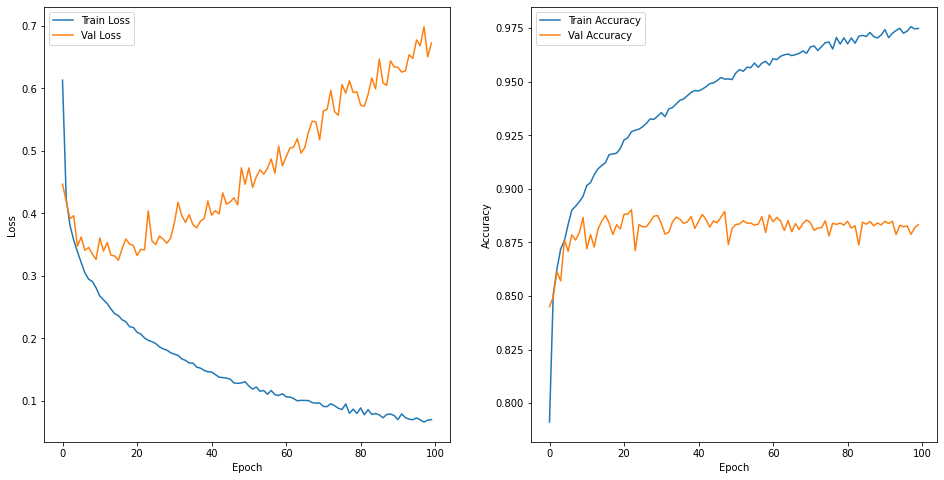

In [13]:
plot_history(history)

In [14]:
# 예측측
y_pred = model.predict(X_test)
y_pred[:1]

313/313 [==============================] - 0s 1ms/step


array([[3.8421534e-19, 0.0000000e+00, 2.1946558e-24, 4.0393832e-29,
        2.4143467e-28, 4.0184175e-15, 2.3615353e-34, 4.3028511e-08,
        9.1167101e-24, 1.0000000e+00]], dtype=float32)

In [15]:
# 가장 확률 높은 곳의 인덱스 추출출
y_pred_argmax = np.argmax(y_pred, axis=1)
y_pred_argmax[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

<Figure size 1152x432 with 0 Axes>

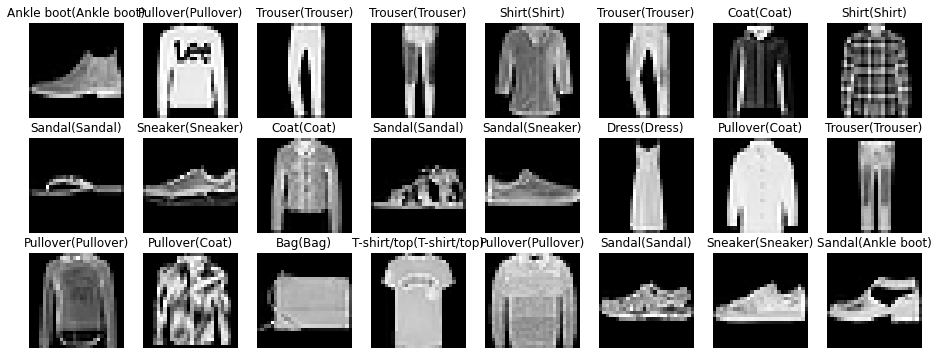

In [16]:
# 예측 값 시각화화
n_rows = 3
n_cols = 8
plt.figure(figsize=(n_cols * 2, n_rows * 2))
plt.figure(figsize=(n_cols * 2, n_rows * 2))

for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_test[index].reshape(28,28), cmap="gray")
    plt.axis('off')
    plt.title(f'{class_names[y_pred_argmax[index]]}({class_names[y_test[index]]})')
plt.show()

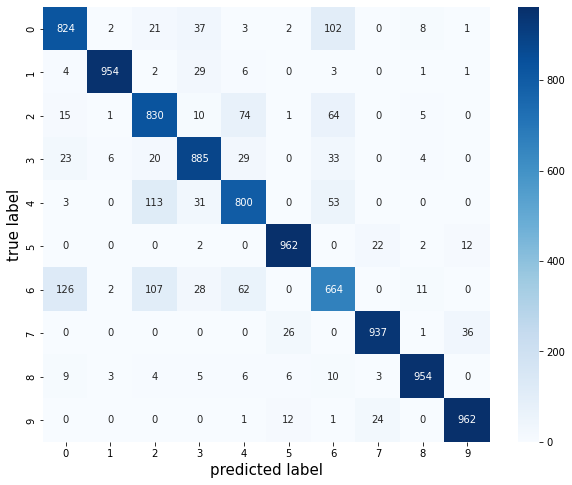

In [17]:
# 혼동 행렬 시각화화
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_matrix(y_test, y_pred):
  plt.figure(figsize = (10, 8))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
  plt.xlabel('predicted label', fontsize = 15)
  plt.ylabel('true label', fontsize = 15)
  plt.show()

plot_matrix(y_test, y_pred_argmax)

In [18]:
# 평가 지표 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_score(y_test, y_pred):
  print('accuracy: %.3f' % (accuracy_score(y_test, y_pred)))
  print('precision: %.3f' % (precision_score(y_test, y_pred, average='macro')))
  print('recall_score: %.3f' % (recall_score(y_test, y_pred, average='macro')))
  print('f1_score: %.3f' % (f1_score(y_test, y_pred, average='macro')))

print_score(y_test, y_pred_argmax)

accuracy: 0.877
precision: 0.878
recall_score: 0.877
f1_score: 0.877
